In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
# conda install -c conda-forge mlxtend

In [2]:
movies = pd.read_csv("C:\\Users\\DIMPLE\\Desktop\\Data Science\\Assignments\\Association Rules 9\\my_movies.csv")
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
df=pd.get_dummies(movies)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


calculating by keep the support at 50%

In [4]:
# calculating by keep the support at 50%
frequent_itemsets = apriori(df, min_support=0.50, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Sixth Sense, Gladiator)"
6,0.6,"(Patriot, Gladiator)"
7,0.6,"(V1_Gladiator, Gladiator)"
8,0.6,"(Gladiator, V2_Patriot)"
9,0.6,"(V1_Gladiator, Patriot)"


In [5]:
#keeping the confidence at 70%
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [6]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
38,"(V1_Gladiator, Patriot, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
28,"(Gladiator, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
29,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
31,(V2_Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
32,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
33,"(V1_Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
34,"(Patriot, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
35,(V1_Gladiator),"(Patriot, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
36,(Patriot),"(V1_Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [7]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


calculating by keep the support at 60%

In [8]:
frequent_itemsets = apriori(df, min_support=0.60, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.6,"(Patriot, Gladiator)"
6,0.6,"(V1_Gladiator, Gladiator)"
7,0.6,"(Gladiator, V2_Patriot)"
8,0.6,"(V1_Gladiator, Patriot)"
9,0.6,"(Patriot, V2_Patriot)"


In [9]:
#keeping the confidence at 70%
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
7,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
8,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [10]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
49,(V2_Patriot),"(V1_Gladiator, Patriot, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
20,"(Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
23,(V2_Patriot),"(Patriot, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
24,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
26,"(Gladiator, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
27,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
29,(V2_Patriot),"(V1_Gladiator, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
30,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
31,"(V1_Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
32,"(Patriot, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [11]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
7,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
8,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [12]:
#To eliminate Redudancy in Rules
def to_list(i):
    return (sorted(list(i)))

In [13]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [14]:
ma_X

0                               [Patriot, Gladiator]
1                               [Gladiator, Patriot]
2                          [V1_Gladiator, Gladiator]
3                          [Gladiator, V1_Gladiator]
4                            [Gladiator, V2_Patriot]
5                            [V2_Patriot, Gladiator]
6                            [V1_Gladiator, Patriot]
7                            [Patriot, V1_Gladiator]
8                              [Patriot, V2_Patriot]
9                              [V2_Patriot, Patriot]
10                        [V1_Gladiator, V2_Patriot]
11                        [V2_Patriot, V1_Gladiator]
12                [Patriot, V1_Gladiator, Gladiator]
13                [Gladiator, V1_Gladiator, Patriot]
14                [Gladiator, Patriot, V1_Gladiator]
15                [V1_Gladiator, Gladiator, Patriot]
16                [Patriot, Gladiator, V1_Gladiator]
17                [Gladiator, Patriot, V1_Gladiator]
18                  [Gladiator, Patriot, V2_Pa

In [15]:
ma_X = ma_X.apply(sorted)

In [16]:
rules_sets = list(ma_X)

In [17]:
rules_sets

[['Gladiator', 'Patriot'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'V1_Gladiator'],
 ['Gladiator', 'V1_Gladiator'],
 ['Gladiator', 'V2_Patriot'],
 ['Gladiator', 'V2_Patriot'],
 ['Patriot', 'V1_Gladiator'],
 ['Patriot', 'V1_Gladiator'],
 ['Patriot', 'V2_Patriot'],
 ['Patriot', 'V2_Patriot'],
 ['V1_Gladiator', 'V2_Patriot'],
 ['V1_Gladiator', 'V2_Patriot'],
 ['Gladiator', 'Patriot', 'V1_Gladiator'],
 ['Gladiator', 'Patriot', 'V1_Gladiator'],
 ['Gladiator', 'Patriot', 'V1_Gladiator'],
 ['Gladiator', 'Patriot', 'V1_Gladiator'],
 ['Gladiator', 'Patriot', 'V1_Gladiator'],
 ['Gladiator', 'Patriot', 'V1_Gladiator'],
 ['Gladiator', 'Patriot', 'V2_Patriot'],
 ['Gladiator', 'Patriot', 'V2_Patriot'],
 ['Gladiator', 'Patriot', 'V2_Patriot'],
 ['Gladiator', 'Patriot', 'V2_Patriot'],
 ['Gladiator', 'Patriot', 'V2_Patriot'],
 ['Gladiator', 'Patriot', 'V2_Patriot'],
 ['Gladiator', 'V1_Gladiator', 'V2_Patriot'],
 ['Gladiator', 'V1_Gladiator', 'V2_Patriot'],
 ['Gladiator', 'V1_Gladiator', 'V2_Patriot']

In [18]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [19]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

In [20]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
18,"(Patriot, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
6,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
24,"(V1_Gladiator, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
30,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
36,"(V1_Gladiator, Patriot, Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
10,(V1_Gladiator),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
4,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
12,"(V1_Gladiator, Patriot)",(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


VI_Gladiator and V2_Patriot are highly associated

In [21]:
# Transform antecedent, consequent, and support columns into matrix
support_table = rules_no_redudancy.pivot(index='consequents', columns='antecedents', values='support')

In [22]:
import seaborn as sns

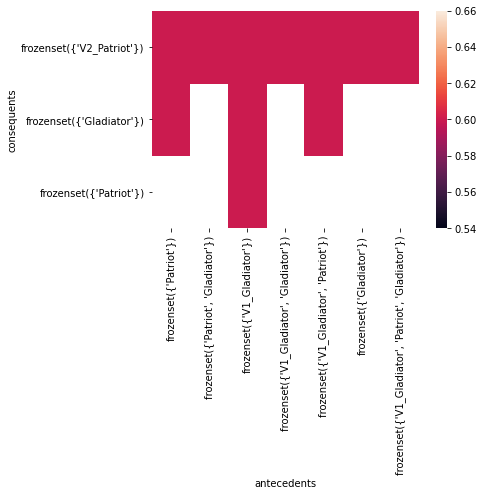

In [23]:
# Generate heatmap
sns.heatmap(support_table)

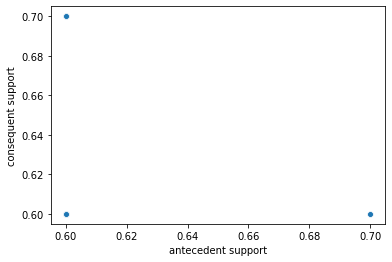

In [24]:
sns.scatterplot(x="antecedent support", y="consequent support", data=rules_no_redudancy)

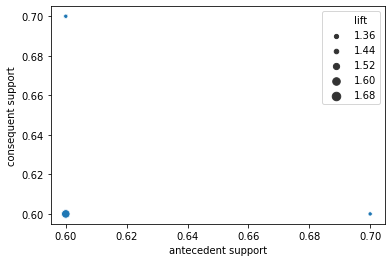

In [25]:
#adding a third Matrix
sns.scatterplot(x="antecedent support", y="consequent support",
size="lift", data=rules_no_redudancy)

calculating by keep the support at 70%

In [26]:
frequent_itemsets = apriori(df, min_support=0.70, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.7,(Gladiator)


In [27]:
#not enought evidence for association with 70% support